In [3]:
import sys
sys.path.append('../')
from config import configuration
config = configuration()
config.request_password()

 ·············


In [18]:
import sqlutilpy
data = pd.DataFrame(
         sqlutilpy.get('''
         with p as (select * from thomas_molnar.virac2_variable_sources_eaeb where prob>0.9 and class='RRab')
         select p.*,v.l,v.b,v.ks_ivw_mean_mag,v.j_ivw_mean_mag from p inner join thomas_molnar.virac2_variable_data as v on p.sourceid=v.sourceid''',
                    **config.wsdb_kwargs)
       )

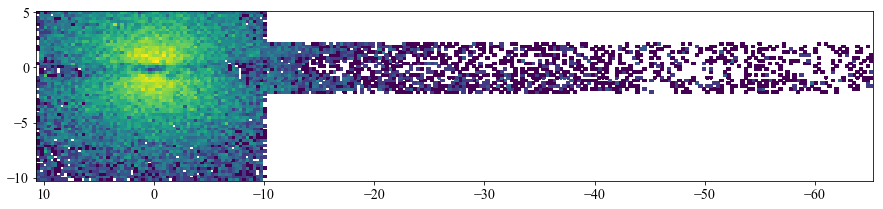

In [16]:
plt.figure(figsize=[15.,8.])
plt.hist2d(data['l']-360.*(data['l']>180.),data['b'],bins=[240,60],norm=LogNorm());
plt.gca().set_aspect('equal')
plt.gca().invert_xaxis()

In [20]:

coeff = 0.528
dist_rrab = np.power(10.,0.2*(
    data['ks_ivw_mean_mag']-coeff*(data['j_ivw_mean_mag']- data['ks_ivw_mean_mag'])
    +2.53*np.log10(data['lsq_period'])+1.03)-2)

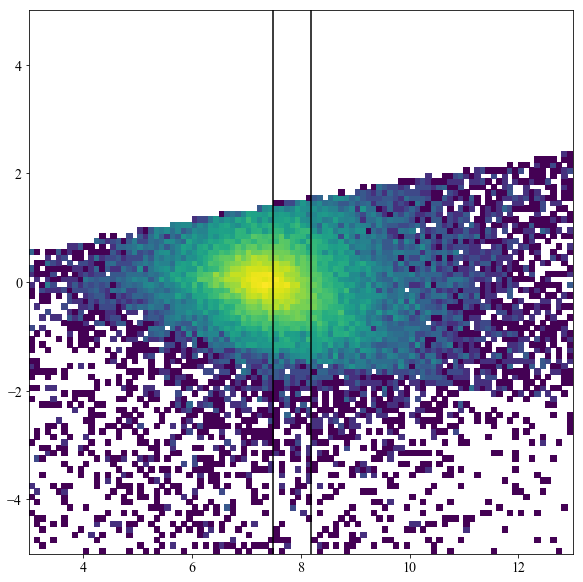

In [30]:
plt.figure(figsize=[10.,10.])
plt.hist2d((dist_rrab*np.cos(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b']))),
           (dist_rrab*np.sin(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b']))),
          range=[[3,13],[-5,5]],bins=100,norm=LogNorm());
plt.gca().set_aspect('equal')
plt.axvline(8.18,color='k')
plt.axvline(7.48,color='k')

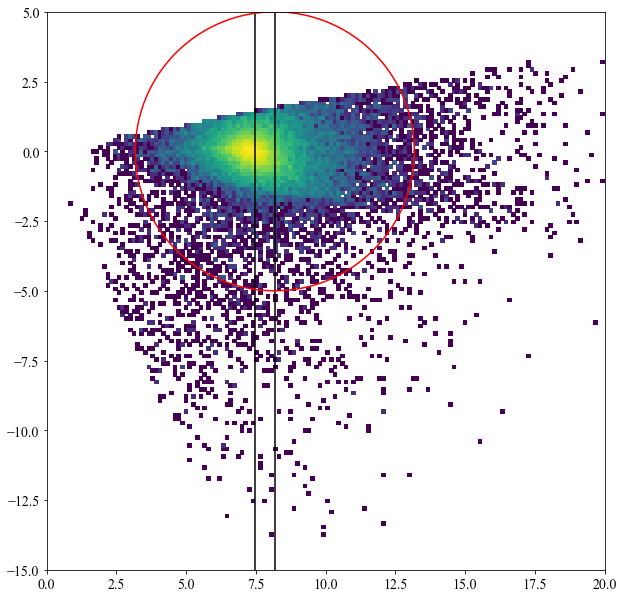

In [37]:
plt.figure(figsize=[10.,22.])
plt.hist2d((dist_rrab*np.cos(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b']))),
           (dist_rrab*np.sin(np.deg2rad(data['l']))*np.cos(np.deg2rad(data['b']))),
          range=[[0,20],[-15,5]],bins=150,norm=LogNorm());
plt.gca().set_aspect('equal')
plt.axvline(8.18,color='k')
plt.axvline(7.48,color='k')
theta = np.linspace(0.,2*np.pi,1000)
R0=5.
plt.plot(np.cos(theta)*R0+8.18,np.sin(theta)*R0,color='r')

In [56]:
import sqlutilpy
data = pd.DataFrame(
         sqlutilpy.get('''
         select * from leigh_smith.virac2 limit 1000000''',
                    **config.wsdb_kwargs)
       )

/data/jls/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


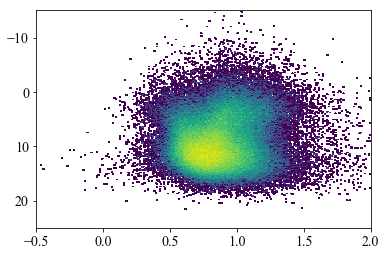

In [78]:
fltr = (data['duplicate']==0)&(data['astfit_params']==5)&(data['ks_n_detections']/data['ks_n_observations']>0.2)
# fltr &= (data['parallax_error']/data['parallax']>0.)&
# fltr &= (data['parallax']>30.)
plt.hist2d((data['j_ivw_mean_mag']-data['ks_ivw_mean_mag'])[fltr],
           (data['ks_ivw_mean_mag']-5*np.log10(100./data['parallax']))[fltr],
           range=[[-0.5,2.],[-15,25]],bins=250,norm=LogNorm())
plt.gca().invert_yaxis()